Mcdonald Market Segmentation Case Study- Kalyani bhosale

In [3]:
import numpy as np

In [23]:
import pandas as pd

In [25]:
from os.path import exists

In [27]:
import sys

In [47]:
import flexcluster
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import os

In [143]:
#from flexcluster import stepFlexclust, relabel, bootFlexclust
#from flexmix import stepFlexmix, getModel, flexmix
#from partykit import ctree

In [145]:
exists('mcdonalds_data.csv')
True

True

In [171]:
mcdonalds = pd.read_csv('mcdonalds.csv')

In [173]:
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [174]:
print(mcdonalds.shape)

(1453, 15)


In [176]:
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [178]:
MD_x = (mcdonalds.iloc[:, 0:11] == 'Yes').astype(int)
print(MD_x.mean().round(2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [180]:
MD_pca = PCA(n_components=len(MD_x.columns))
MD_pca.fit(MD_x)
print(f'Explained variance ratio: {MD_pca.explained_variance_ratio_.round(1)}')
print(MD_pca.components_.round(1))

Explained variance ratio: [0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


<Figure size 640x480 with 0 Axes>

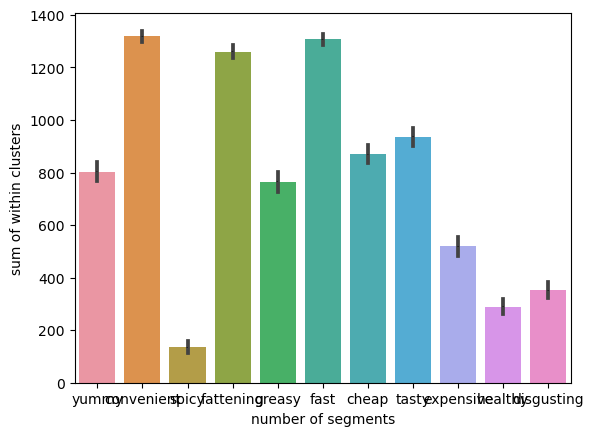

<Figure size 640x480 with 0 Axes>

In [183]:
MD_km28 = sns.barplot(MD_x,estimator="sum")
MD_km28.bar_label(MD_km28.containers[0],fontsize=1)
plt.xlabel("number of segments")
plt.ylabel("sum of within clusters")
plt.figure()

<Axes: >

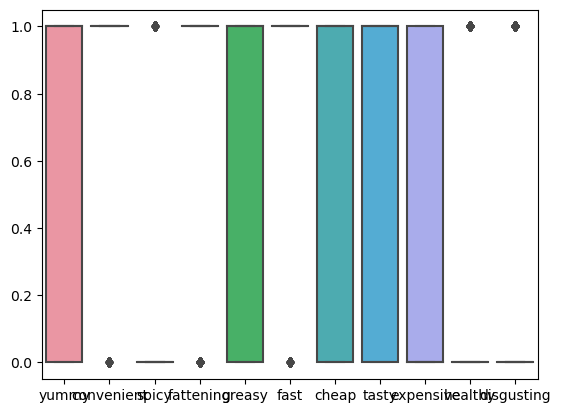

In [184]:
sns.boxplot(MD_x)

#MD_b28 = bootFlexclust(MD_x, range(2, 9), nrep=10, nboot=100)
#plt.figure()
#MD_b28.plot(xlab='number of segments', ylab='adjusted Rand index')

In [189]:
mcdonalds.corr(numeric_only = True)

,Age
Age,1.0


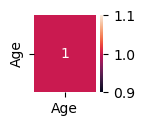

In [191]:
plt.figure(figsize=(1,1))
sns.heatmap(mcdonalds.corr(numeric_only = True), annot=True)
plt.show()

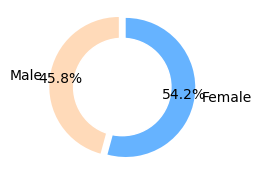

In [195]:
labels = ['Male','Female']
sizes = [mcdonalds.query('Gender == "Male"').Gender.count(),mcdonalds.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(2,2)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

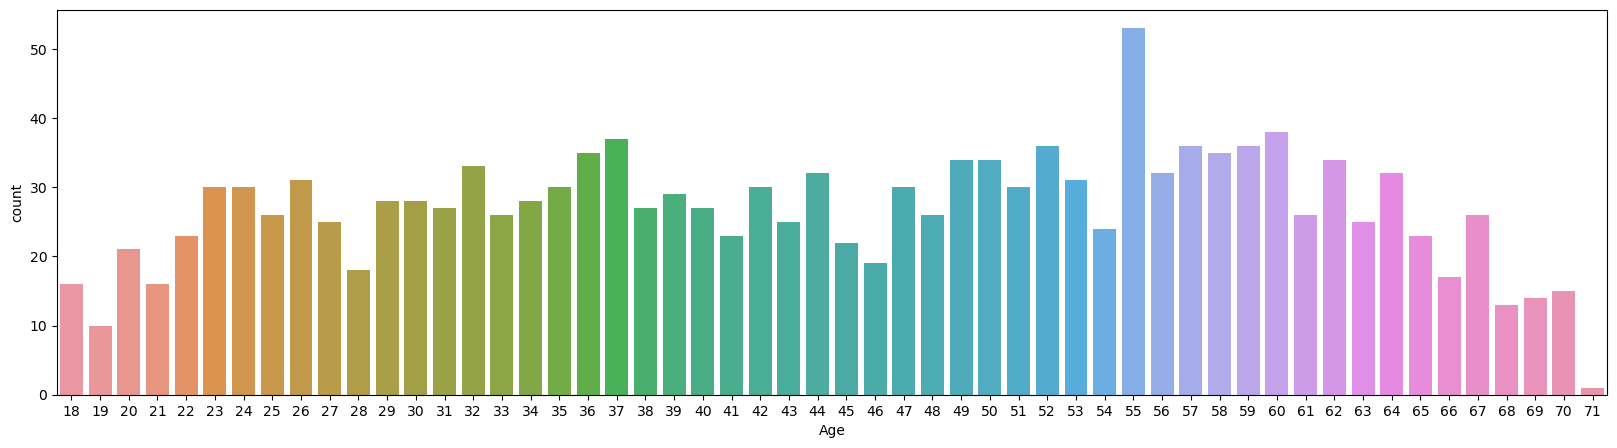

In [197]:
plt.figure(figsize=(20,5))
sns.countplot(x=mcdonalds.Age)
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

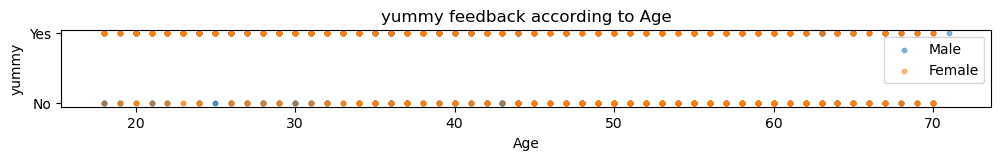

In [203]:
plt.figure(figsize=(12,1))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='yummy', data=mcdonalds[mcdonalds['Gender']==i],s = 10 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("yummy")
plt.title("yummy feedback according to Age")
plt.show()

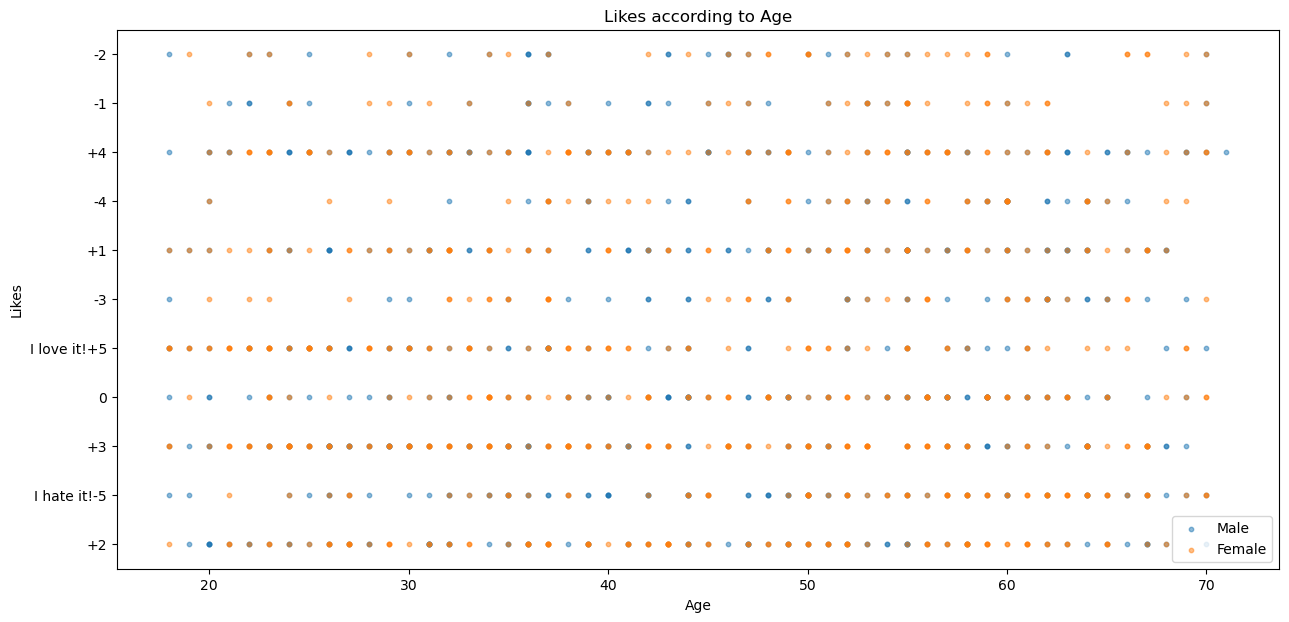

In [205]:
plt.figure(figsize=(15,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='Like', data=mcdonalds[mcdonalds['Gender']==i],s = 10 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Likes")
plt.title("Likes according to Age")
plt.show()

Implement Clustering Algorithms

K-Means Clustering Algorithm

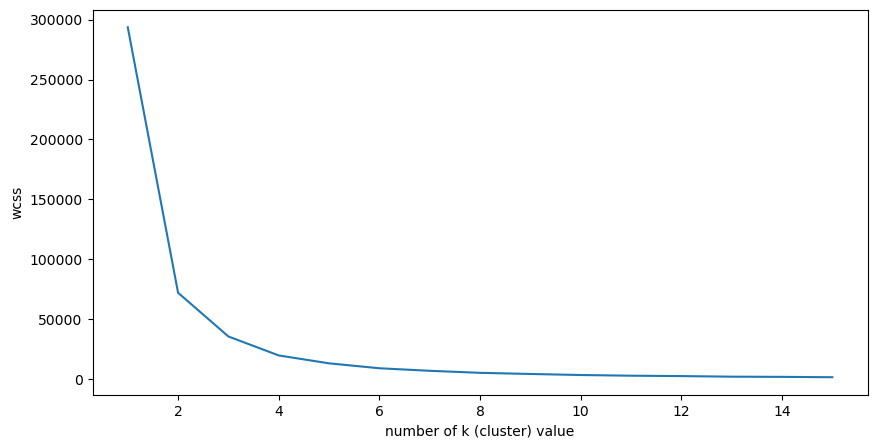

In [209]:
import warnings
warnings.filterwarnings("ignore")
wcss = []
data_model = mcdonalds.drop(['Gender','yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting','Like','VisitFrequency'],axis=1)
for k in range(1,16):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,16),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

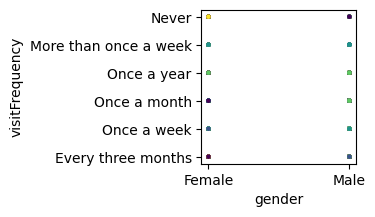

In [213]:
kmeans = KMeans(n_clusters=5)
data_predict = kmeans.fit_predict(data_model)

plt.figure(figsize=(2,2))
cols_list1 = mcdonalds['Gender'].tolist()
cols_list2 = mcdonalds['VisitFrequency'].tolist()
plt.scatter( x = cols_list1,y = cols_list2, data = data_model , c = data_predict , s = 5 )
plt.xlabel("gender")
plt.ylabel("visitFrequency")
plt.show()

Hierarchical Clustering Algorithm

Create demogram and find the best clustering value

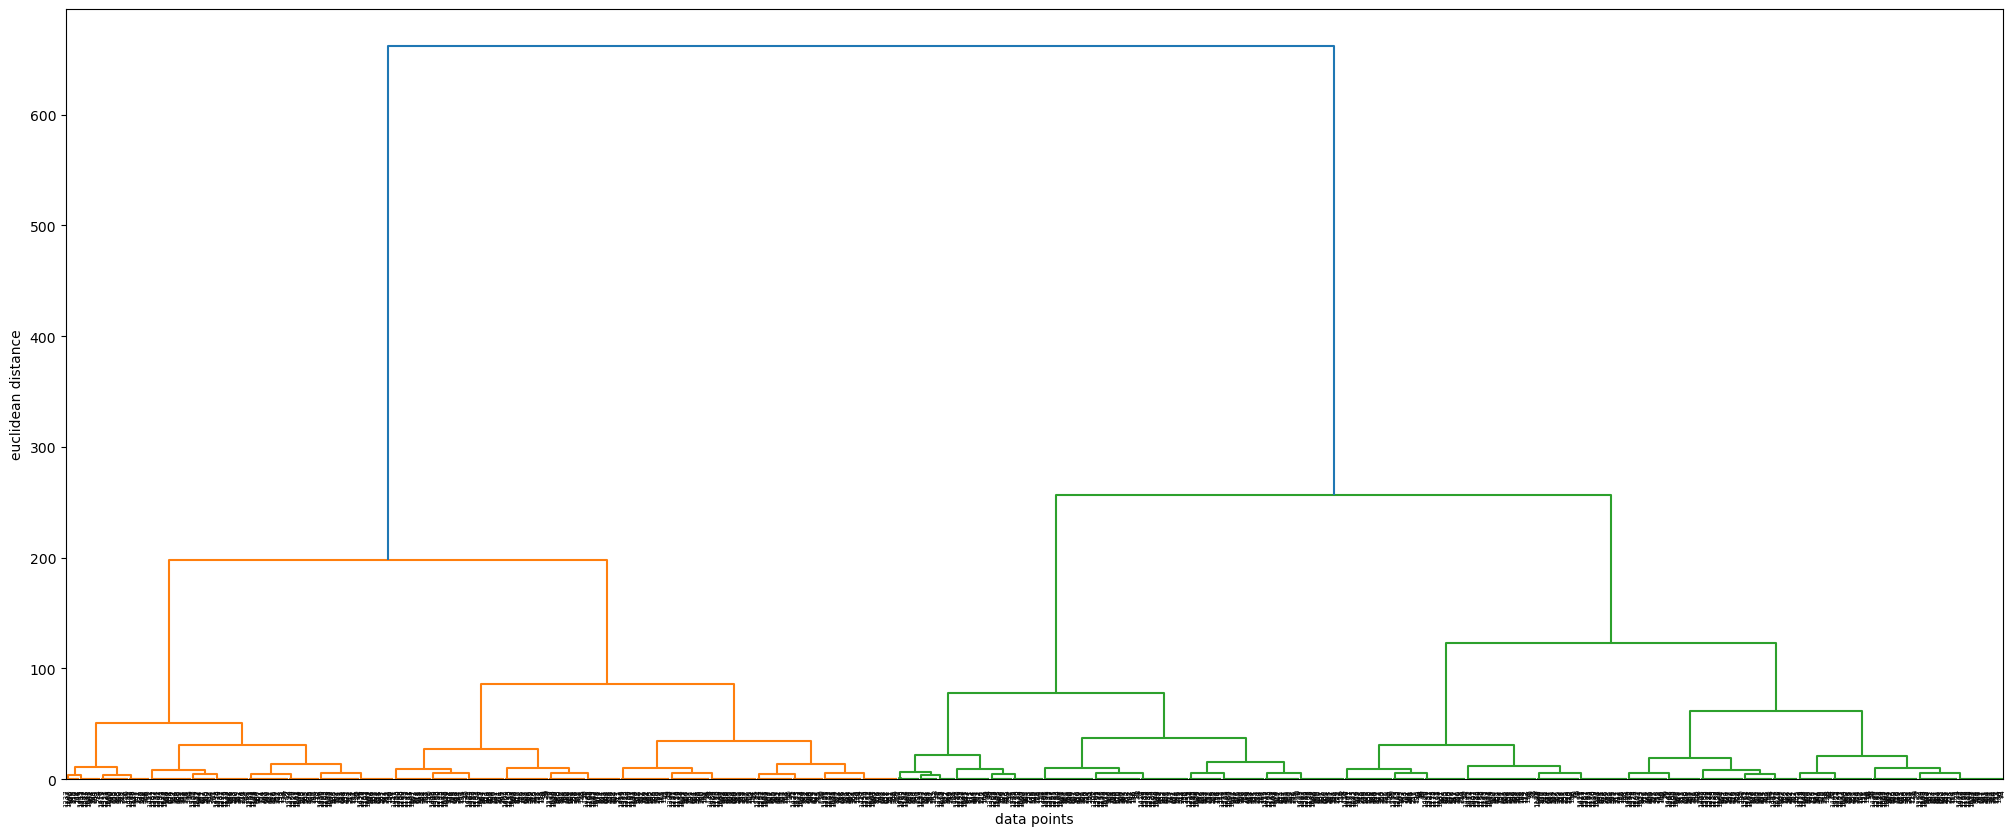

In [217]:
merg = linkage(data_model,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

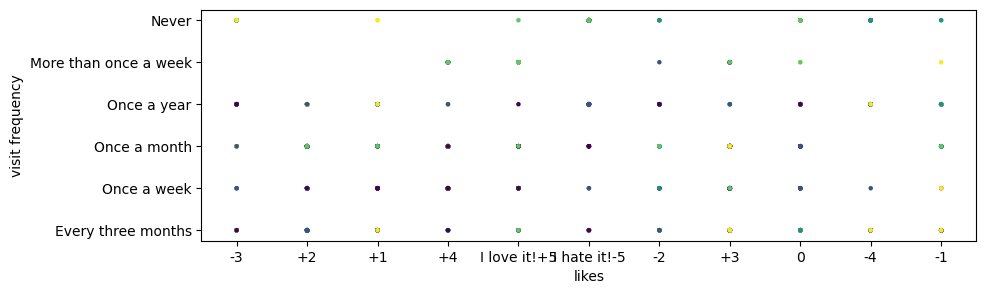

In [219]:
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 5,affinity= "euclidean",linkage = "ward")
data_predict = hiyerartical_cluster.fit_predict(data_model)
plt.figure(figsize=(10,3))
cols_list1 = mcdonalds['Like'].tolist()
cols_list2 = mcdonalds['VisitFrequency'].tolist()
plt.scatter( x = cols_list1,y = cols_list2, data = data_model , c = data_predict , s = 5 )
plt.xlabel("likes")
plt.ylabel("visit frequency")
plt.show()

code ends here